In [22]:
#importing dependencies and libraries 
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns 

In [23]:
from config import password

protocol = 'postgresql'
username = 'postgres'
host = 'localhost'
port = 5432
database_name = 'telecom_customers'
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)

* How many customers joined the company during the last quarter? How many customers joined?

* What is the customer profile for a customer that churned, joined, and stayed? Are they different?

* What seem to be the key drivers of customer churn?

* Is the company losing high value customers? If so, how can they retain them?

In [24]:
#read in csv 
telecoms_data = "./data/telecom_customer_churn.csv"
telecoms_df = pd.read_csv(telecoms_data)

telecoms_df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


# Summary Statistics

In [6]:
summary_df = telecoms_df.describe()
summary_df

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [7]:
summary_df[1:2]

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056


In [8]:
summary_df.loc['max']

Age                                     80.000000
Number of Dependents                     9.000000
Zip Code                             96150.000000
Latitude                                41.962127
Longitude                             -114.192901
Number of Referrals                     11.000000
Tenure in Months                        72.000000
Avg Monthly Long Distance Charges       49.990000
Avg Monthly GB Download                 85.000000
Monthly Charge                         118.750000
Total Charges                         8684.800000
Total Refunds                           49.790000
Total Extra Data Charges               150.000000
Total Long Distance Charges           3564.720000
Total Revenue                        11979.340000
Name: max, dtype: float64

C:\Users\Spectre 13 X360\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


Text(0, 0.5, 'Count')

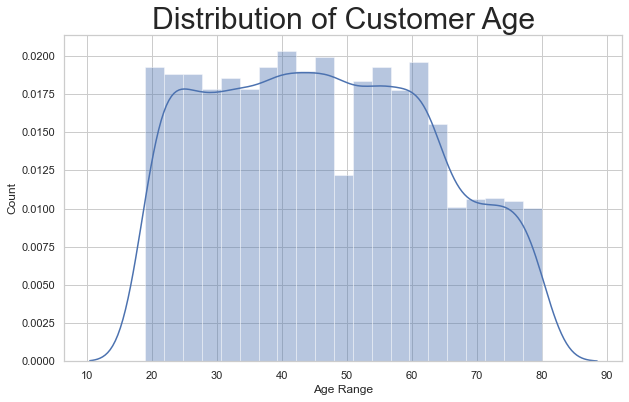

In [9]:
#Distribution of Age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(telecoms_df['Age'])
plt.title('Distribution of Customer Age', fontsize = 30)
plt.xlabel('Age Range')
plt.ylabel('Count')

# Visualisations

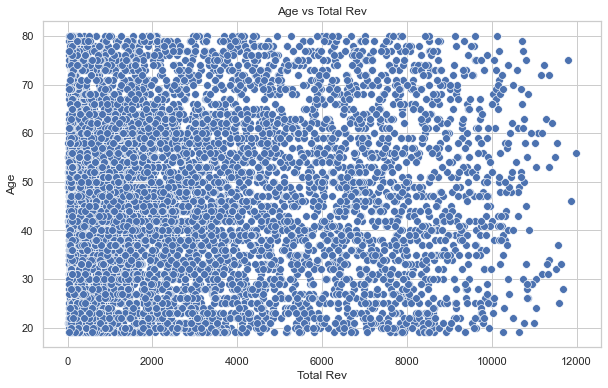

In [10]:
#Scatterplot of the Age vs Total Rev

plt.figure(figsize=(10,6))
sns.scatterplot(x = telecoms_df['Total Revenue'],y = telecoms_df['Age'] ,s = 60 )
plt.xlabel('Total Rev')
plt.ylabel('Age') 
plt.title('Age vs Total Rev')
plt.show()

C:\Users\Spectre 13 X360\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


Text(0, 0.5, 'Count')

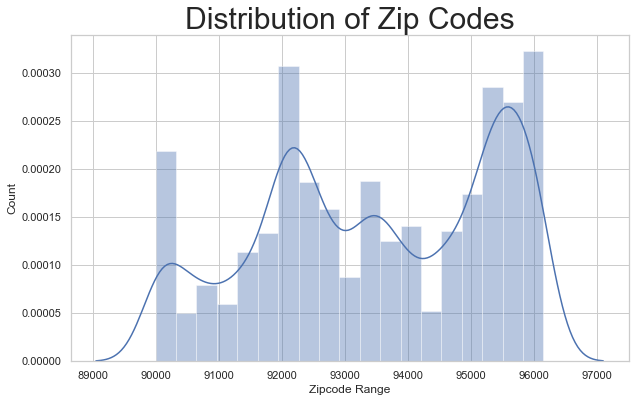

In [11]:
#Distribution of Zip Codes


plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(telecoms_df['Zip Code'])
plt.title('Distribution of Zip Codes', fontsize = 30)
plt.xlabel('Zipcode Range')
plt.ylabel('Count')

C:\Users\Spectre 13 X360\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


Text(0, 0.5, 'Count')

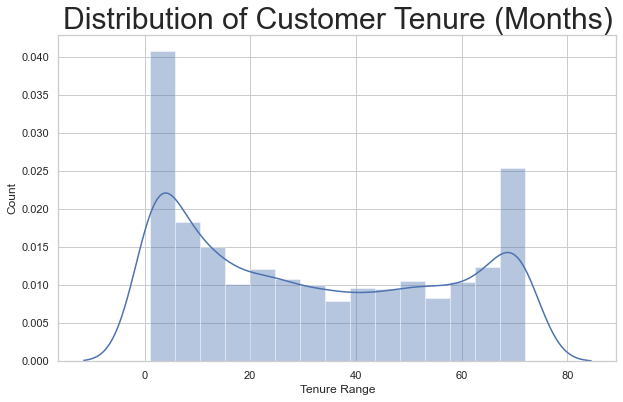

In [12]:
#Distribution of Tenure
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(telecoms_df['Tenure in Months'])
plt.title('Distribution of Customer Tenure (Months)', fontsize = 30)
plt.xlabel('Tenure Range')
plt.ylabel('Count')

In [13]:
telecoms_df['Tenure in Months'].min()

1

In [14]:
telecoms_df['Tenure in Months'].value_counts().loc[lambda x : x<1]

#application_df['CLASSIFICATION'].value_counts().loc[lambda x : x>1] 


Series([], Name: Tenure in Months, dtype: int64)

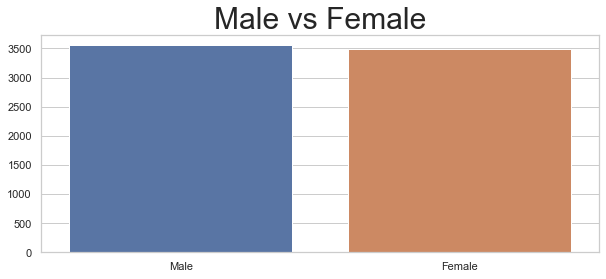

In [15]:
#Bar chart - male vs female 

genders = telecoms_df.Gender.value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
plt.title('Male vs Female', fontsize = 30)
sns.barplot(x=genders.index, y=genders.values)
plt.show()

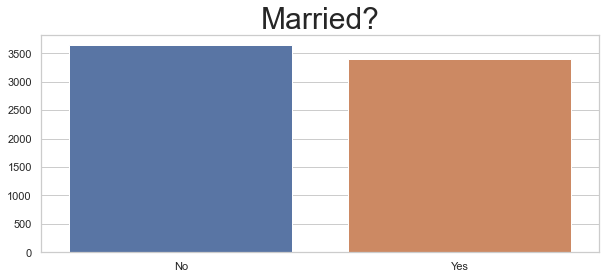

In [16]:
#Plot bar charts - Marital Status

married = telecoms_df.Married.value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
plt.title('Married?', fontsize = 30)
sns.barplot(x=married.index, y=married.values)
plt.show()

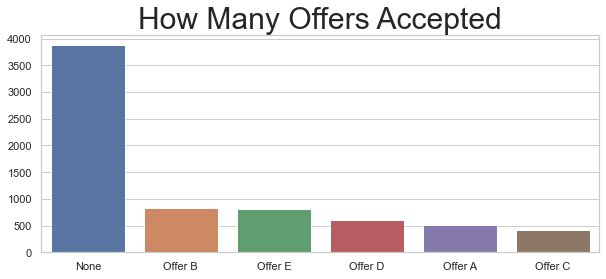

In [17]:
#Plot bar charts - Offers

offers = telecoms_df.Offer.value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
plt.title('How Many Offers Accepted', fontsize = 30)
sns.barplot(x=offers.index, y=offers.values)
plt.show()

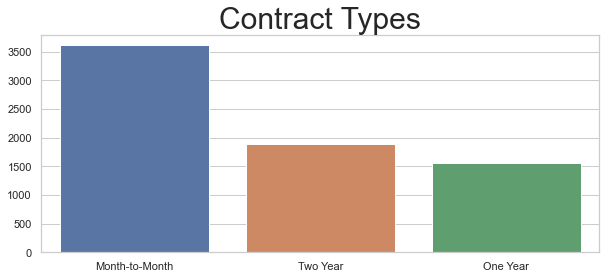

In [18]:
#Plot bar charts - contract types

contracts = telecoms_df.Contract.value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
plt.title('Contract Types', fontsize = 30)
sns.barplot(x=contracts.index, y=contracts.values)
plt.show()

C:\Users\Spectre 13 X360\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


Text(0, 0.5, 'Count')

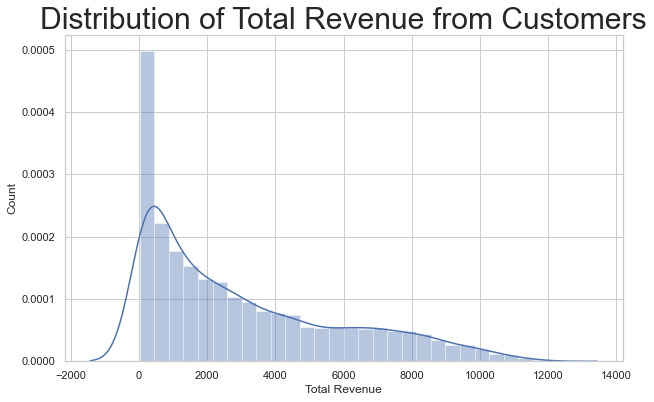

In [19]:
#Distribution of Total Revenue 

plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(telecoms_df['Total Revenue'])
plt.title('Distribution of Total Revenue from Customers', fontsize = 30)
plt.xlabel('Total Revenue')
plt.ylabel('Count')

In [20]:
telecoms_df['Total Revenue'].min()

21.36